In [41]:
## Importing all required libraries ##
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
#Other important libraries are imported later on in the notebook for ease of understanding, usually it is a good practice to import everything at the start of your notebook

In [15]:
df = pd.read_csv('Live.csv')

In [ ]:
# Some elementary EDA

In [ ]:
#Lets take a look at the data to determine which features to use for clustering. Let's start by loading the data and examining the first few rows and the structure of the dataset.


In [17]:
# Display the first few rows of the dataframe and the data types
df.head(), df.dtypes

(                          status_id status_type status_published  \
 0  246675545449582_1649696485147474       video   4/22/2018 6:00   
 1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
 2  246675545449582_1648730588577397       video   4/21/2018 6:17   
 3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
 4  246675545449582_1645700502213739       photo   4/18/2018 3:22   
 
    num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
 0            529           512         262        432         92         3   
 1            150             0           0        150          0         0   
 2            227           236          57        204         21         1   
 3            111             0           0        111          0         0   
 4            213             0           0        204          9         0   
 
    num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
 0          1         1           

In [21]:
#Checking for Missing values
df.isnull().sum()


status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [23]:
#Col 1,2,3 and 4 are Null and redundant completely, hence we should remove (drop) them
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [29]:
#Checking for no of unique values within our features (using len to get the count)
len(df['status_id'].unique())


6997

In [39]:
len(df['status_type'].unique())


4

In [37]:
#further examination of this feature
df['status_type'].unique()
#can be valuable in our analysis

array(['video', 'photo', 'link', 'status'], dtype=object)

In [33]:
len(df['status_published'].unique())


6913

In [43]:
''' The dataset includes various features related to social media status updates.

Overview of Features:

The dataset includes numerical metrics that measure different types of user interactions:

num_reactions: Total number of reactions to a post. Reactions can include likes, loves, wows, etc. This is a broad measure of how users respond to content.

num_comments: Counts how many comments were made on the post. High numbers might indicate that the content is provocative (Provokes a response), asks a question, or otherwise encourages discussions.

num_shares: Indicates how many times the post was shared. Shares can significantly increase a post's reach and are often a sign of endorsement or the desire to spread the information.

num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys: These are more specific types of reactions that give insights into the emotional response of the audience towards the content.'''

" The dataset includes various features related to social media status updates.\n\nOverview of Features:\n\nThe dataset includes numerical metrics that measure different types of user interactions:\n\nnum_reactions: Total number of reactions to a post. Reactions can include likes, loves, wows, etc. This is a broad measure of how users respond to content.\n\nnum_comments: Counts how many comments were made on the post. High numbers might indicate that the content is provocative (Provokes a response), asks a question, or otherwise encourages discussions.\n\nnum_shares: Indicates how many times the post was shared. Shares can significantly increase a post's reach and are often a sign of endorsement or the desire to spread the information.\n\nnum_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys: These are more specific types of reactions that give insights into the emotional response of the audience towards the content."

In [ ]:
'''Logic behind chosen features: 

1. Relevance to the Domain
The selected features are all directly related to user engagement metrics on social media posts, which include:

num_reactions
num_comments
num_shares
num_likes
num_loves
num_wows
num_hahas
num_sads
num_angrys

These features are quantifiable indicators of how users interact with content, such as through likes, shares, comments, and various emotional reactions (love, wow, haha, sad, angry). This makes them highly relevant for analysing and understanding patterns in social media behavior, such as identifying posts that display strong emotional responses or those that encourage discussion.

3. Avoiding High Cardinality
We specifically avoided using features with a high number of unique values, such as status_id and status_published. These features are essentially identifiers and timestamps that are unique to individual posts, offering no meaningful way to group data points since each unique identifier only applies to a single post. Clustering algorithms like K-means aim to find groups of similar items, and using features that are unique to each item would not help in finding such groups.

4. Potential for Insight
The chosen features allow us to potentially uncover insights such as:
Similarities in engagement types across different posts.
Grouping posts by engagement patterns, which could reveal what types of content tend to receive similar types and amounts of interactions.

5. Scalability and Standardization

By selecting features that are on a similar scale (counts of different types of interactions), it ensures that one feature does not disproportionately influence the cluster assignment due to its scale. Standardising these features, which we will do via scaling, further helps in treating all features equally in the clustering process.
This approach ensures that the clustering results are not only statistically valid but also meaningful and interpretable within the context of social media analytics.



In [45]:
#Feature Selection : Based on the logic written above we select these features for our K-Means Clustering
features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 
            'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

In [47]:
from sklearn.preprocessing import StandardScaler #To standardise our values
from sklearn.cluster import KMeans # Our Model
from sklearn.decomposition import PCA # Since our dimesionality is of a higher degree, we use PCA to create meaningful 2D visuals 
from sklearn.metrics import silhouette_score 
#Other necessary tools from the sklearn library 

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
'''To thoroughly evaluate the clustering models for different values of k 
using K-means, we can compute metrics such as the silhouette score for each 
k (which provides a sense of cluster cohesion and separation)'''

In [103]:
# Applying K-means 
results = {}
for k in [2, 3, 4, 5,6,7,8,9,10,11]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    
    # PCA for dimensionality reduction to 2D for visualization
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_scaled)
    
    results[k] = {
        'labels': labels,
        'pca_components': principal_components
    }

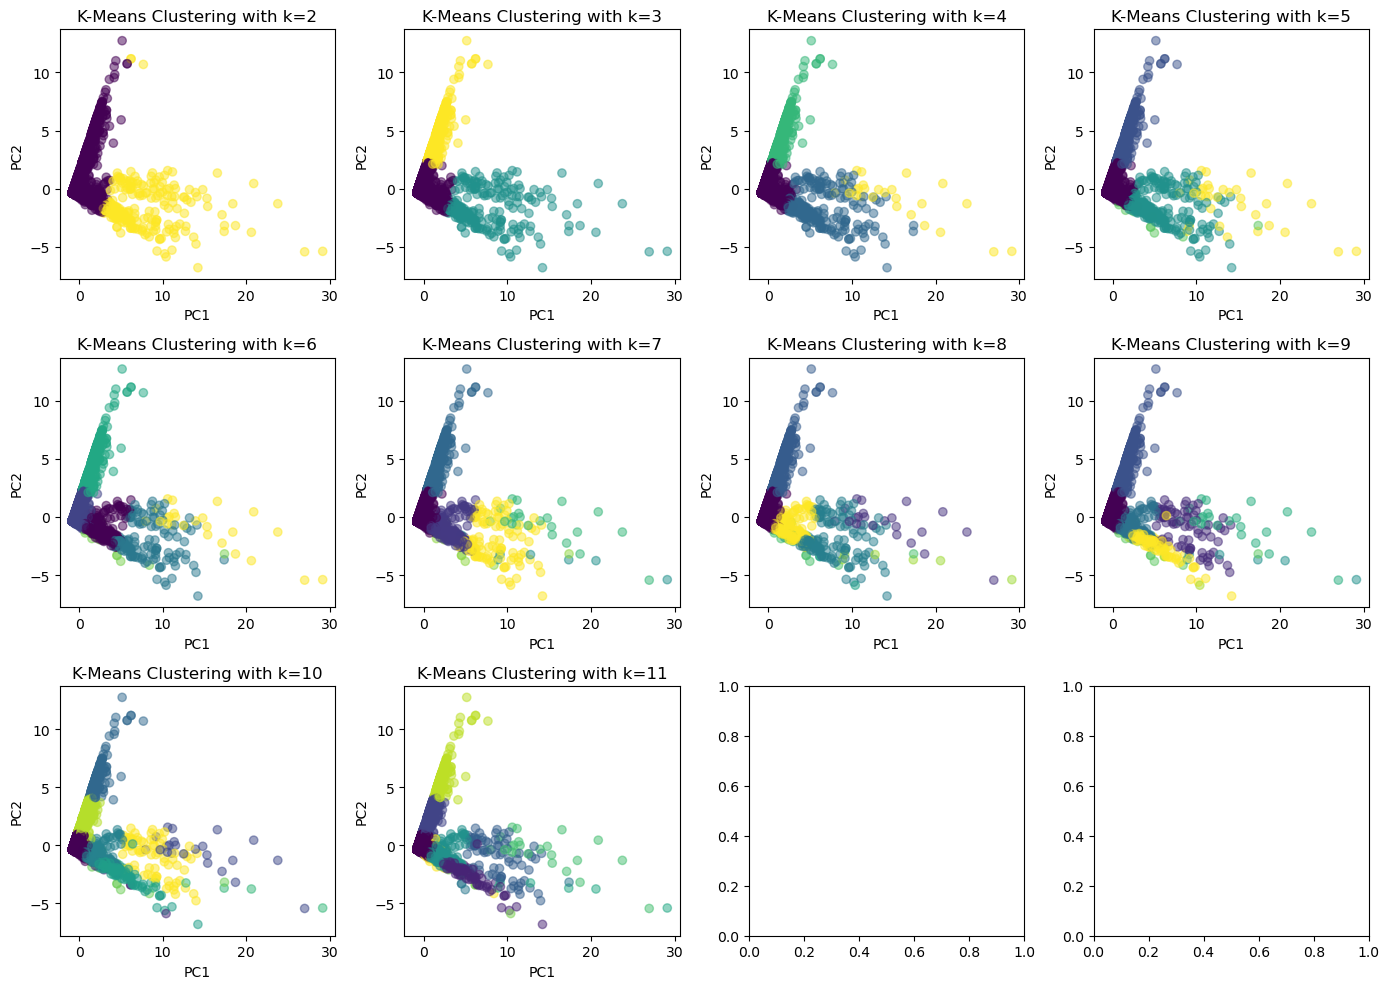

In [111]:
# Plotting the results
fig, axes = plt.subplots(3, 4, figsize=(14, 10))
axes = axes.ravel()

for i, k in enumerate([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]):
    pca_components = results[k]['pca_components']
    labels = results[k]['labels']
    if i < 10:
        axes[i].scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis', alpha=0.5)
        axes[i].set_title(f'K-Means Clustering with k={k}')
        axes[i].set_xlabel('PC1')
        axes[i].set_ylabel('PC2')

plt.tight_layout()
plt.show()

In [113]:
# Calculate the silhouette scores for different values of k
silhouette_scores = {}
for k in [2, 3, 4, 5,6,7,8,9,10,11]:
    labels = results[k]['labels']
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = score

silhouette_scores


{2: 0.8157664963353164,
 3: 0.7499921477392748,
 4: 0.7566415831793409,
 5: 0.7609294896257128,
 6: 0.7140576613050015,
 7: 0.7181418523656731,
 8: 0.7121833991238358,
 9: 0.7104098182809936,
 10: 0.6932667670715073,
 11: 0.6966510920680359}

In [ ]:
'''The silhouette score runs from -1 to 1, with 1 indicating a perfect fit and -1 indicating a poor match between 
the data points and their corresponding cluster'''

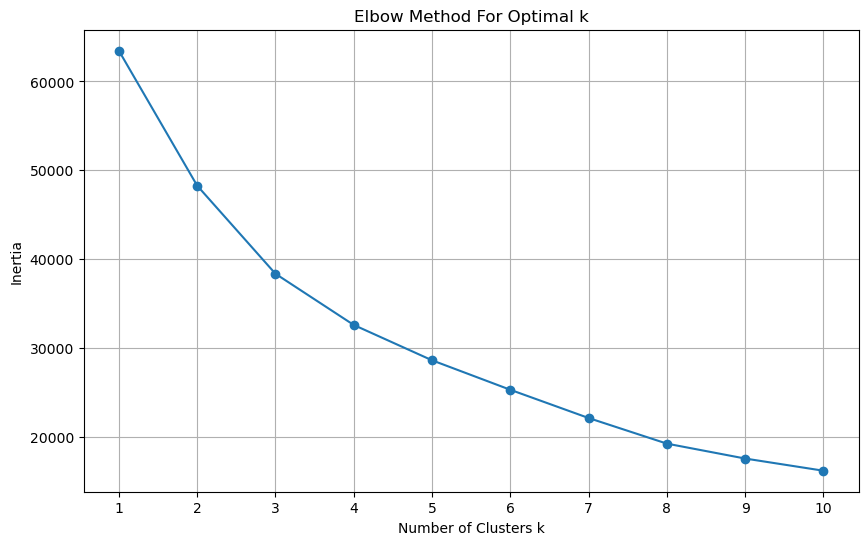

In [115]:
# Calculate and plot the Elbow Method for k = 1 to 10
inertia = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the inertia
plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(range_k)
plt.grid(True)
plt.show()

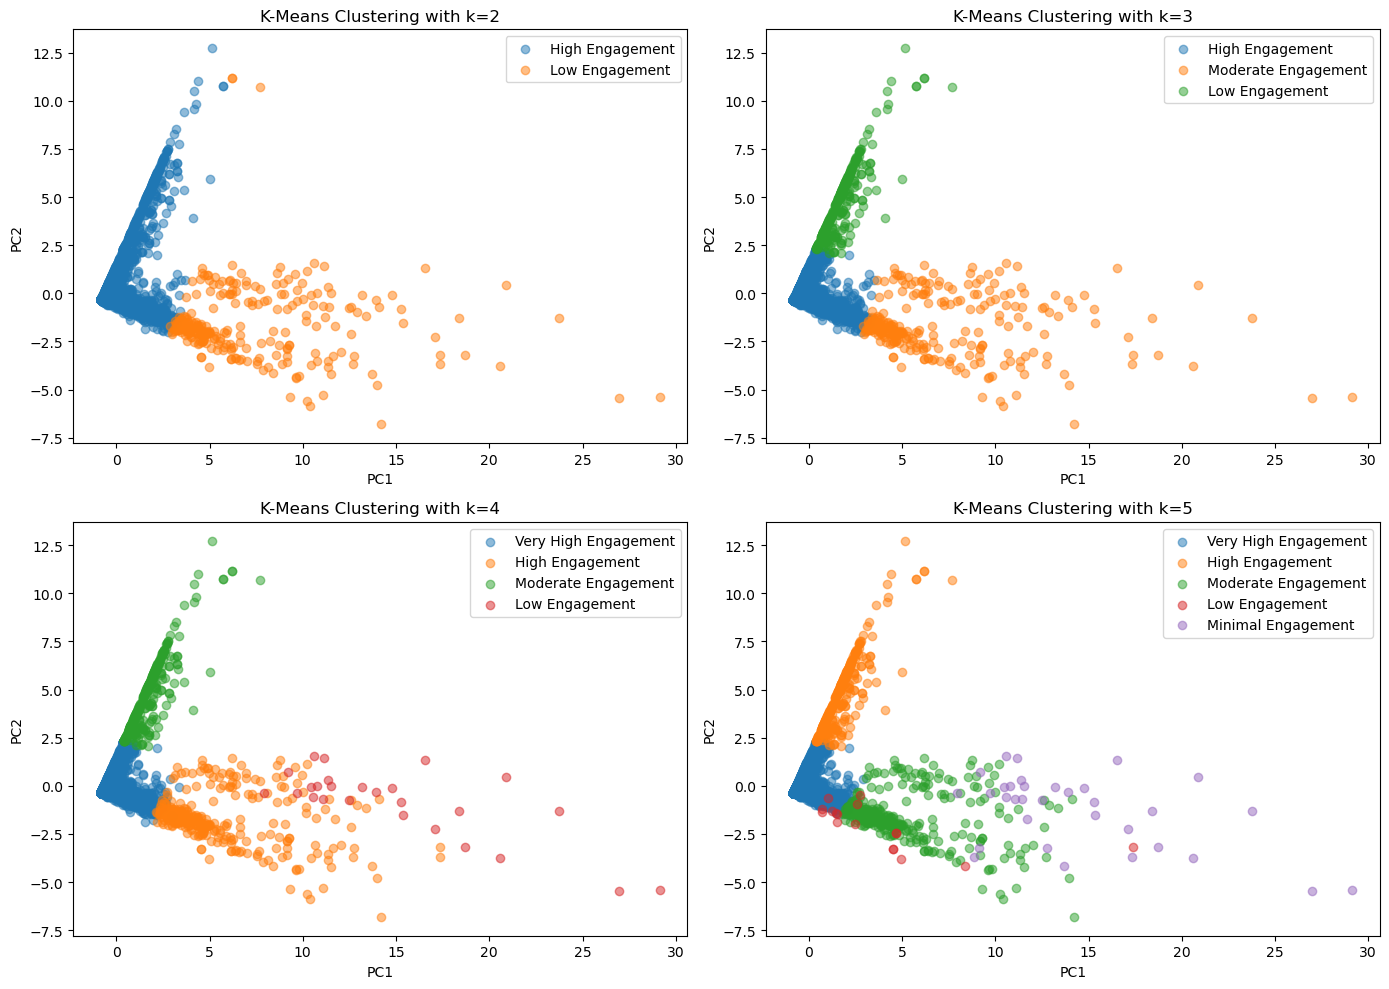

In [119]:
# Replotting with meaningful legend labels for each k
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

cluster_labels = {
    2: ['High Engagement', 'Low Engagement'],
    3: ['High Engagement', 'Moderate Engagement', 'Low Engagement'],
    4: ['Very High Engagement', 'High Engagement', 'Moderate Engagement', 'Low Engagement'],
    5: ['Very High Engagement', 'High Engagement', 'Moderate Engagement', 'Low Engagement', 'Minimal Engagement']
}
for i, k in enumerate([2, 3, 4, 5]):
    pca_components = results[k]['pca_components']
    labels = results[k]['labels']
    unique_labels = set(labels)
    
    for label in unique_labels:
        # Select indices and respective components
        indices = [idx for idx, val in enumerate(labels) if val == label]
        components_x = pca_components[indices, 0]
        components_y = pca_components[indices, 1]
        
        # Plot each cluster
        axes[i].scatter(components_x, components_y, alpha=0.5, label=f'{cluster_labels[k][label]}')
    
    axes[i].set_title(f'K-Means Clustering with k={k}')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    axes[i].legend()

plt.tight_layout()
plt.show()

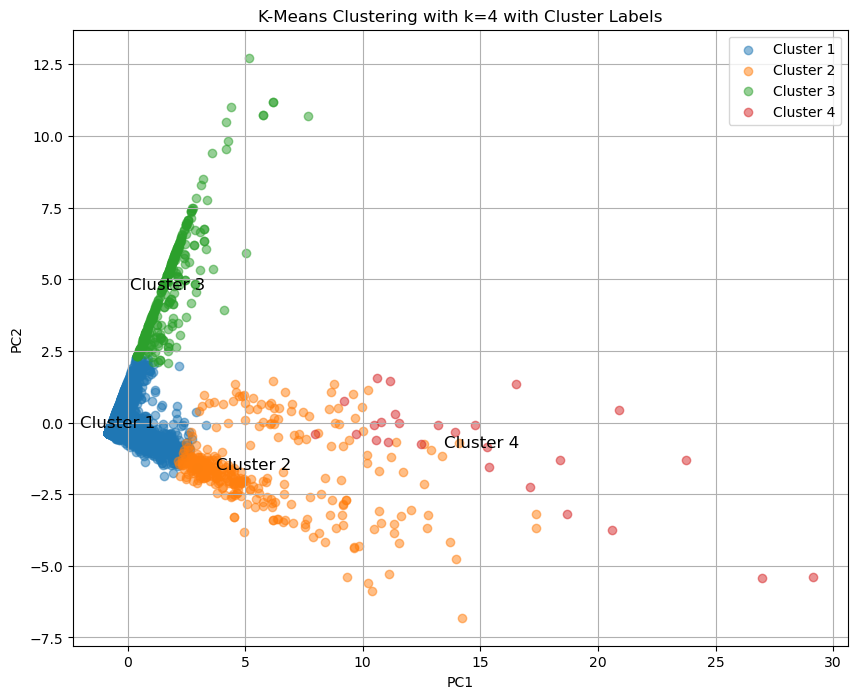

In [135]:
#labelling for k=4 as an example
plt.figure(figsize=(10, 8))
pca_components = results[4]['pca_components']
labels = results[4]['labels']

# Scatter plot
for label in set(labels):
    indices = labels == label
    plt.scatter(pca_components[indices, 0], pca_components[indices, 1], alpha=0.5, label=f'Cluster {label+1}')
    # Annotate cluster number
    center = pca_components[indices].mean(axis=0)
    plt.text(center[0], center[1], f'Cluster {label+1}', fontsize=12, ha='center')

plt.title('K-Means Clustering with k=4 with Cluster Labels')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
# Check for content type in the dataset and calculate the mean of features for each cluster 
content_types = df['status_type'].unique() if 'status_type' in df.columns else None

# Mean of features for k=2 to k=5
cluster_means_k2 = df.assign(cluster=results[2]['labels']).groupby('cluster')[features].mean()
cluster_means_k3 = df.assign(cluster=results[3]['labels']).groupby('cluster')[features].mean()
cluster_means_k4 = df.assign(cluster=results[4]['labels']).groupby('cluster')[features].mean()
cluster_means_k5 = df.assign(cluster=results[5]['labels']).groupby('cluster')[features].mean()

content_types,cluster_means_k2,cluster_means_k3, cluster_means_k4, cluster_means_k5

(array(['video', 'photo', 'link', 'status'], dtype=object),
          num_reactions  num_comments  num_shares   num_likes   num_loves  \
 cluster                                                                    
 0           206.013725    104.041913   21.208973  197.605962    7.233471   
 1           826.193431   3199.715328  505.281022  646.262774  148.624088   
 
           num_wows  num_hahas  num_sads  num_angrys  
 cluster                                              
 0         0.646104   0.331169  0.142710    0.051505  
 1        17.197080   9.729927  2.740876    1.638686  ,
          num_reactions  num_comments  num_shares    num_likes   num_loves  \
 cluster                                                                     
 0           113.854489    106.228571   21.711319   105.294770    7.464637   
 1           786.871795   3217.948718  508.300366   606.293040  149.344322   
 2          1823.311828     61.333333   11.645161  1817.534946    3.104839   
 
           num_wo

In [123]:
cluster_summaries = {}
for k in results:
    cluster_summary = df.assign(cluster=results[k]['labels']).groupby('cluster')[features].mean()
    cluster_summaries[k] = cluster_summary

In [133]:
cluster_summary


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
cluster,,,,,,,,,
0,82.294128,27.574377,4.332740,79.619217,2.083808,0.391993,0.122064,0.061388,0.013345
1,401.875000,5808.579545,367.943182,315.000000,71.988636,3.318182,8.056818,2.920455,0.590909
2,974.160819,45.190058,7.593567,967.105263,4.043860,2.783626,0.154971,0.052632,0.020468
3,1235.962025,2814.240506,717.265823,991.000000,221.468354,11.240506,8.240506,1.797468,2.215190
4,750.000000,512.000000,178.250000,581.250000,108.000000,10.750000,4.250000,45.000000,0.750000
5,256.395672,942.582689,216.573416,185.077280,66.159196,1.408037,2.752705,0.499227,0.489954
6,1250.428571,1038.285714,368.142857,891.428571,228.714286,28.571429,97.142857,3.000000,1.571429
7,1551.434783,1606.782609,830.652174,1105.347826,299.478261,131.826087,11.478261,1.521739,1.782609
8,225.400000,28.800000,2.600000,200.400000,0.200000,4.400000,1.200000,1.000000,18.200000


In [ ]:
''' But what is the data telling me?

Content Engagement:
for k=4 & 5 there is a common recurrence,

We typically see high numbers across all engagement metrics, 
especially loves and wows, indicating that this content is highly resonant, possibly emotionally charged or highly entertaining.

The "High Engagement" clusters (e.g., Cluster 1) show high reactions and likes but significantly lower comments and shares,
suggesting these might be content that is widely liked but less controversial or requiring less interaction.

In [ ]:
'''
Content Type Hypothesis:

Videos and statuses might be driving higher engagement in terms of comments and shares, 
particularly if they involve topical or controversial subjects that encourage discussion or sharing.

Whereas, photos might be driving higher reactions in terms of likes and loves, 
especially if they are visually appealing or emotionally touching. 
'''

In [ ]:
'''
Strategic Insights:

Emotionally Engaging Content: Content that stimulates higher loves and wows may be particularly 
effective in creating emotional connections with the audience. 
This could include inspirational, humorous, or awe-inspiring content. 
Identifying what specific characteristics these high-love and high-wow posts share 
could guide the creation of future content that aims to strike similar emotional chords.

Interactive Content: Posts that generate a lot of comments and shares typically encourage interaction. 
These might include question-based posts, contests, or topics that are currently trending or controversial. 
For a social media strategy, focusing on interactive content can boost community 
engagement and increase visibility due to the algorithmic preferences of many platforms for content that generates conversation.

Visual Content: High engagements in clusters with lots of likes but fewer comments might indicate the effectiveness
of visually appealing content or straightforward posts that are easily consumable and likable, such as high-quality
images or graphics. These are likely to attract quick reactions like likes and loves without necessarily prompting 
further interaction.'''

In [ ]:
'''
Optimisation for Different Goals: Depending on the social media goals (awareness, engagement, conversion), the strategy might differ.
For instance:

If the goal is to maximise reach and visibility, focus might be placed on content types that are highly shared and commented on.
If the goal is to build a loyal community or emotional brand connection, the focus could be on content that garners loves and wows.'''